Contexto
Utilizaremos un set de datos de las policias de New York del año 2009
y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán
información de los procedimientos policiales realizados. Además se le
entregará el diccionario de variables para que pueda consultar que
significa cada categoría dentro de las variables.
● La variable respuesta 'arstmade' informa si los procedimientos
policiales han terminado en arresto o no, y el objetivo será realizar
un modelo de Machine Learning para predecir si un futuro
procedimiento terminará en arresto.

# P1
Enliste todas las librerías que utilizará
Nota: Se recomienda ir actualizando la lista conforme las necesidades
vaya teniendo durante el desarrollo de la prueba

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn.svm
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# P2
Importación y revisión de los datos
Importe ambos sets. Dado que la fuente de datos proviene de la misma
base, tienen las mismas columnas. Consolide ambos sets y reporte una
exploración básica de los datos (número de filas/columnas, tipos de
datos, estadísticas básicas, casos perdidos)

In [2]:
df1=pd.read_csv('2009_1perc.csv')
df2=pd.read_csv('2010_1perc.csv')
df=pd.concat([df1,df2], axis=0)
print(df2.head())

   Unnamed: 0  year  pct  ser_num  datestop  timestop recstat inout trhsloc  \
0       30569  2010    6      487   1192010      1420       1     O       P   
1      416235  2010   42     7138   9042010       225       1     I       T   
2      318345  2010   33     2628   6302010      1240       1     I       T   
3      541524  2010  108     6384  11172010      2338       1     O       P   
4      113101  2010   14     2295   3072010      2240       1     I       T   

   perobs  ... zip  addrpct sector beat post   xcoord  ycoord dettypcm linecm  \
0       2  ...            6      G        38   983543  208767       CM      1   
1      10  ...           42      E            1014172  241737       CM      1   
2       5  ...           33      B    6       1000916  245710       CM      1   
3       3  ...          108      J            1012612  212240       CM      1   
4       5  ...           14      C    7        987636  212439       CM      1   

   detailcm  
0        85  
1        4

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(16), object(95)
memory usage: 10.2+ MB
None
          Unnamed: 0          year           pct       ser_num      datestop  \
count   11825.000000  11825.000000  11825.000000  11825.000000  1.182500e+04   
mean   295983.814799   2009.508499     68.625624   5697.994334  6.364221e+06   
std    170820.705702      0.499949     33.037826   5152.486022  3.429091e+06   
min        52.000000   2009.000000      1.000000      1.000000  1.012009e+06   
25%    147515.000000   2009.000000     42.000000   2002.000000  3.232009e+06   
50%    296652.000000   2010.000000     73.000000   4366.000000  6.162010e+06   
75%    443097.000000   2010.000000    102.000000   7840.000000  9.232009e+06   
max    601281.000000   2010.000000    123.000000  31694.000000  1.231201e+07   

           timestop        perobs       perstop  compyear  comppct  \
count  11825.000000

# P3
Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga
los siguientes pasos para limpiar este set:


3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categórica)

In [4]:
df_cat = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).nunique().between(2, 99)].tolist()
print(df_cat)

['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm']


3.2 Reemplace las siguientes clases faltantes: -Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y' -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [5]:
df[['officrid', 'offshld', 'offverb']] = df[['officrid', 'offshld', 'offverb']].replace(" ", "N")
df[['sector', 'trhsloc', 'beat']] = df[['sector', 'trhsloc', 'beat']].replace(" ", "U")
print(df[['officrid', 'offshld', 'offverb']].head())
print(df[['sector', 'trhsloc', 'beat']].head())

  officrid offshld offverb
0        N       N       N
1        N       S       V
2        N       S       N
3        N       N       N
4        N       N       N
  sector trhsloc beat
0      G       P    7
1      J       P    U
2      E       P    U
3      J       P    4
4      H       P    U


3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [6]:
df['meters'] = (df['ht_feet'] * 0.3048) + (df['ht_inch'] * 0.0254)
print(df['meters'].head())

0    1.7526
1    1.6510
2    1.9050
3    1.6510
4    1.6764
Name: meters, dtype: float64


3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente

In [7]:
df['month'] = pd.to_datetime(df['datestop'], format='%m%d%Y').dt.month
df['year'] = pd.to_datetime(df['datestop'], format='%m%d%Y').dt.year
print(df['month'].head())
print(df['year'].head())

0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int64
0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int64


3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades estén entre 18 y 100 años, ambos inclusive.

In [9]:
filtro = df_cat + ['month', 'year', 'meters', 'age']
df1 = df[filtro]
df1 = df1[(df1['age'] >= 18) & (df1['age'] <= 100)]
print(df1.head(),'\n')

  recstat inout trhsloc typeofid explnstp othpers arstmade sumissue offunif  \
0       A     O       P        P        Y       N        N        N       Y   
2       1     O       P        V        Y       N        N        N       N   
3       A     O       P        P        Y       N        N        N       Y   
4       A     O       P        P        Y       Y        N        N       Y   
5       1     I       T        V        Y       N        N        N       N   

  officrid  ... addrtyp       city sector beat dettypcm linecm month  year  \
0        N  ...       L      BRONX      G    7       CM      1     4  2009   
2        N  ...       L      BRONX      E    U       CM      1    10  2009   
3        N  ...       L   BROOKLYN      J    4       CM      1    12  2009   
4        N  ...       L     QUEENS      H    U       CM      1    12  2009   
5        I  ...       L  MANHATTAN      F   16       CM      1     5  2009   

   meters age  
0  1.7526  24  
2  1.9050  21  
3  1.651

# P4
Análisis exploratorio

4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

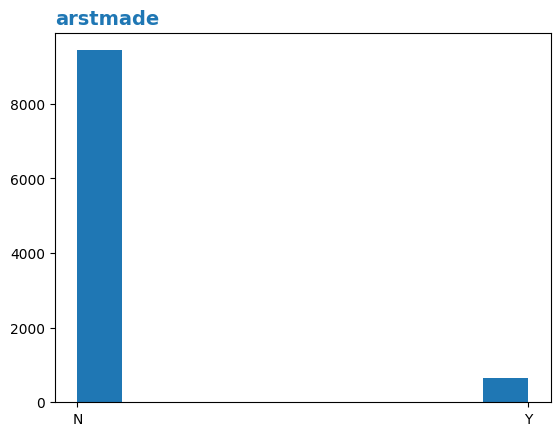

In [10]:
fig, ax=plt.subplots()
x=df1['arstmade']
ax.hist(x)
ax.set_title('arstmade', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

In [11]:
df1['arstmade'].describe()

count     10078
unique        2
top           N
freq       9432
Name: arstmade, dtype: object

La variable 'arsmade' posee una distribución binomial, con preponderancia en el valo N, con probabilidad 9432/10078=0.94 de ocurrencia.

4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

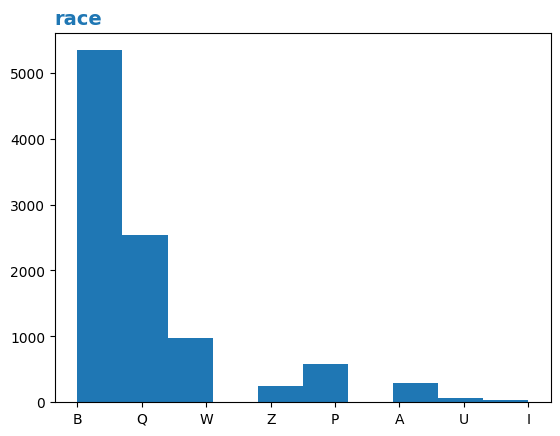

In [12]:
fig, ax=plt.subplots()
x=df1['race']
ax.hist(x)
ax.set_title('race', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

De la observación general de ambaos gráficos, se puede observar que hay más sucesos relacionados con 'B' que el resto, asumo que es algún hecho policial, por lo tanto, podría suponer que en los sucesos de arresto o no, con mayor probabilidad estan involucrados sujetos 'B' (presumo negros). Para tener números habria que dar valor numérico a las variables.

4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

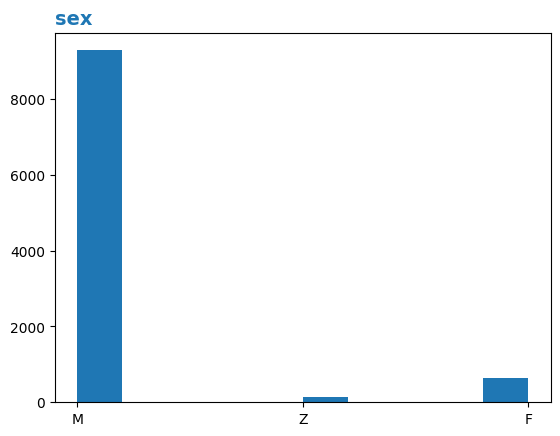

In [13]:
fig, ax=plt.subplots()
x=df1['sex']
ax.hist(x)
ax.set_title('sex', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

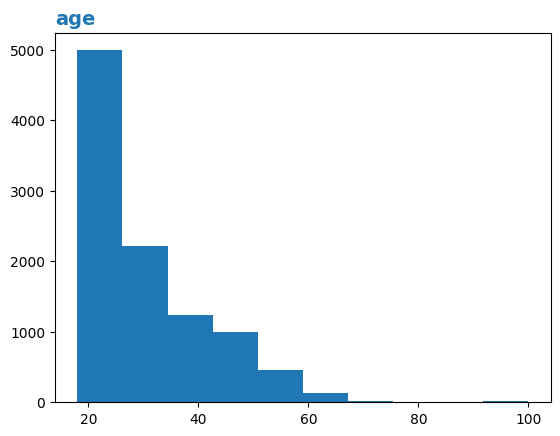

In [14]:
fig, ax=plt.subplots()
x=df1['age']
ax.hist(x)
ax.set_title('age', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

De la onservación de los gráficos, la mayoria de las personas involucrados en sucesos policiciales son hombre entre 20 y 30 años. y del análisis anterior, de raza negra. Y este tipo de persona tiene mayor probabilidad de sr arrestado.

● 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es
Y

In [16]:
print(df1['arstmade'].head())

0    N
2    N
3    N
4    N
5    N
Name: arstmade, dtype: object


In [17]:
df1['arstmade'] = df1['arstmade'].map({'Y': 1, 'N': 0})
print(df1['arstmade'].head())

0    0
2    0
3    0
4    0
5    0
Name: arstmade, dtype: int64


4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?

In [18]:
df2=df1[['arstmade','sex','race']]
condicion=(df2['arstmade']==1)&(df2['sex']=='M')&(df2['race']=='W')
df3=df2[condicion]
print(df3.head())
print(df3.info())

     arstmade sex race
26          1   M    W
42          1   M    W
198         1   M    W
297         1   M    W
646         1   M    W
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 26 to 5870
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   arstmade  62 non-null     int64 
 1   sex       62 non-null     object
 2   race      62 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
None


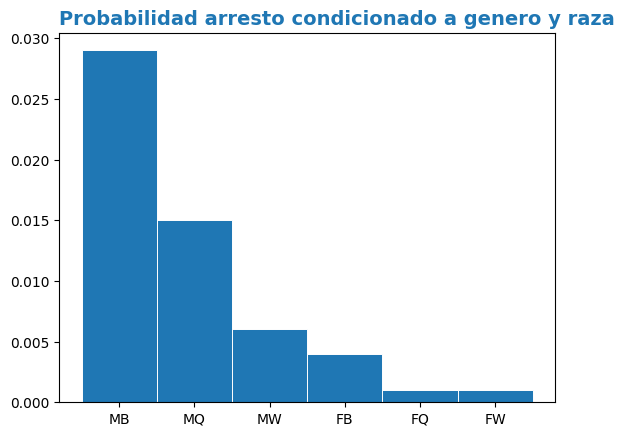

In [19]:
A=['MB','MQ','MW','FB','FQ','FW']
B=[0.029,0.015,0.006,0.004,0.001,0.001] #se construye tabla de valores a partir condición anterior.
fig, ax = plt.subplots()
ax.bar(A, B, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Probabilidad arresto condicionado a genero y raza', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

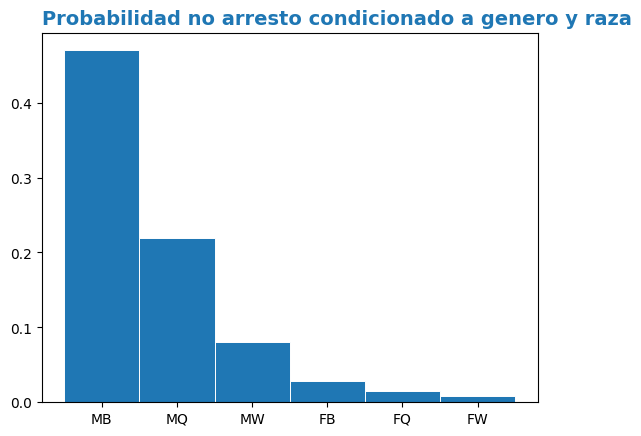

In [20]:
A=['MB','MQ','MW','FB','FQ','FW']
B=[0.47,0.22,0.08,0.028,0.015,0.009] #se construye tabla de valores a partir condición anterior.
fig, ax = plt.subplots()
ax.bar(A, B, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Probabilidad no arresto condicionado a genero y raza', loc = "left", fontdict =
{'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

Al observar la gráfica, y si hablamos de implicancias éticas, podriamos decir que existe una tendencia a arrestar a gente no blanca y de genero masculino. Tal vez, se podria hablar de racismo afectando a los criterios policiales.

# P5
 Determinar si el procedimiento policial concluirá en alguna acción
violenta.
Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y
['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al
momento del procedimiento, con la marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en
cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego
indique el porcentaje de casos que terminaron con violencia.

In [21]:
list1=['pf_hands','pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep','pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other']
for elem in list1:
  df1['violencia'] = df1[elem].apply(lambda x: 1 if x in 'Y' else 0)
print(df1['violencia'].head())
print(df1['violencia'].value_counts())

0    0
2    0
3    0
4    0
5    0
Name: violencia, dtype: int64
0    10041
1       37
Name: violencia, dtype: int64


El número de casos que terminaron con violencia fueron 37, es decir el 0.004%

# P6
Modelación

6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear

In [22]:
df_cat1=df_cat              #lista dtipe=object(sólo ha estos crear dummies)
df_cat1.remove('arstmade')

In [23]:
for elem in df_cat1:
  d = pd.get_dummies(df1[elem], dummy_na = True)
  df1 = pd.concat([df1.drop(elem, axis = 1), d], axis = 1)
df1.columns = df1.columns.astype(str)
print(df1.head())
df1.info()

   arstmade  month  year  meters  age  violencia  1  A  nan  I  ...  9  U  \
0         0      4  2009  1.7526   24          0  0  1    0  0  ...  0  0   
2         0     10  2009  1.9050   21          0  1  0    0  0  ...  0  1   
3         0     12  2009  1.6510   22          0  0  1    0  0  ...  0  0   
4         0     12  2009  1.6764   18          0  0  1    0  0  ...  0  1   
5         0      5  2009  1.7272   47          0  1  0    0  1  ...  0  0   

   nan     CM  nan  1     1  nan  
0    0  0   1    0  1  0  0    0  
2    0  0   1    0  1  0  0    0  
3    0  0   1    0  1  0  0    0  
4    0  0   1    0  1  0  0    0  
5    0  0   1    0  1  0  0    0  

[5 rows x 341 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10078 entries, 0 to 6012
Columns: 341 entries, arstmade to nan
dtypes: float64(1), int64(5), uint8(335)
memory usage: 3.8 MB


In [26]:
df1_2009=df1[(df1['year']==2009)]
df1_2010=df1[(df1['year']==2010)]
Y_train=df1_2009['arstmade']
Y_test=df1_2010['arstmade']
X_train=df1_2009.drop(columns = 'arstmade')
X_test=df1_2010.drop(columns = 'arstmade')
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4987, 340) (4987,)
(5091, 340) (5091,)


6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno)

Regresión logística

In [44]:
clf = LogisticRegression(solver='newton-cholesky',random_state=0,max_iter=5000).fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
Y_prob=clf.predict_proba(X_test)
print(Y_pred[1:10],'\n')
print(Y_prob[1:10],'\n')
print('La accuracy de la regresión logística es: ',clf.score(X_test, Y_test),'\n')


[1 1 1 1 1 1 1 1 1] 

[[7.03300861e-06 9.99992967e-01]
 [3.38393160e-05 9.99966161e-01]
 [1.60501060e-05 9.99983950e-01]
 [1.31050014e-05 9.99986895e-01]
 [2.02728730e-04 9.99797271e-01]
 [1.55090294e-05 9.99984491e-01]
 [3.64794699e-06 9.99996352e-01]
 [6.54904534e-06 9.99993451e-01]
 [5.55861338e-05 9.99944414e-01]] 

La accuracy de la regresión logística es:  0.06717737183264584 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


KNN

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
Y_prob=clf.predict_proba(X_test)
Y_test = np.array(Y_test).reshape(-1, 1)
print('\n',Y_pred[1:10],'\n')
print(Y_prob[1:10],'\n')
print('La accuracy de KNN es: ',clf.score(X_test, Y_pred),'\n')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



 [1 1 1 1 1 1 1 1 1] 

[[0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]
 [0.45 0.55]] 

La accuracy de KNN es:  1.0 



Random Forest

In [40]:
X_train, Y_train = make_classification(n_samples=1000, n_features=340, n_informative=2, n_redundant=0, random_state=10, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_prob=clf.predict_proba(X_test)
print(Y_pred[1:10],'\n')
print(Y_prob[1:10],'\n')
print('La accuracy de Random Forest es: ',clf.score(X_test, Y_pred),'\n')

[1 1 1 1 1 1 1 1 1] 

[[0.47360703 0.52639297]
 [0.48102893 0.51897107]
 [0.46978263 0.53021737]
 [0.47072782 0.52927218]
 [0.4763765  0.5236235 ]
 [0.47975772 0.52024228]
 [0.47920637 0.52079363]
 [0.47701131 0.52298869]
 [0.47154784 0.52845216]] 

La accuracy de Random Forest es:  1.0 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


SVM

In [45]:
import sklearn.svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

X_train, Y_train = make_classification(n_features=340, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(dual=True, random_state=0, tol=1e-5))
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print('\n',Y_pred[1:10],'\n')
print('La accuracy de SKV es: ',clf.score(X_test,Y_pred),'\n')



 [0 0 0 0 0 0 0 0 0] 

La accuracy de SKV es:  1.0 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Seg+un la métrica accuracy, KNN, Random Forest y SVM arrojaron valor ideal 1, y por tanto para este problema, cualquiera de ellos se desempeña adecuadamente. Notemos también, que la regresión logística obtuvo un alto valor, y también es un modelo válido. No hice más pruebas con otros hiperparámetros, porque no habia nada que mejorar, luego estime que era inecesario.



# Bonus
¿Qué puede hacer para mejorar la predicción de los modelos?

Mirando la documentación de Scikit Learn, la función objetivo tiene parámetros, que pueden ser modificados, y que permiten mejorar la accuracy del modelo, por ejemplo se puede usar el método 'newton-cholesky' en el parámetro solver y aumentar el número de iteraciones máximo en el parámetrp max_iter, en el caso de la regresión logística. También es importante, asegurar que los datos de entreda esten lo más limpios posibles, de manera de ejecutar las operaciones computacionales eficientemente. Asegurarse también de tener una muestra suficientemente grande y representativa de lo que realmente se desea estudiar. Y finalmente, estar muy atento a la magnitud de los errores que la ejecución de los modelos arroja, de manera de controlar la fidelidad y confiabilidad de los resultados.